In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
noniidL10E2_path_file = "./output/cifar10/acc/noniid/L10E2/"
noniidL20E5_path_file = "./output/cifar10/acc/noniid/L20E5/"
iidL10E2_path_file = "./output/cifar10/acc/iid/L10E2/"
iidL20E5_path_file = "./output/cifar10/acc/iid/L20E5/"
fontsize = 20

In [10]:
#reading files

noniidL10E2_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_avg5z_rnd_num_client300.part10_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_avg10z_rnd_num_client300.part20_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_avg10z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
]

noniidL20E5_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G5000_avg5z_rnd_num_client300.part10_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G5000_avg10z_rnd_num_client300.part20_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G5000_avg10z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
]


iidL10E2_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_avg5z_rnd_num_client300.part10_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_avg10z_rnd_num_client300.part20_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_avg10z_rnd_num_client300.part30_partition_iid_nclient300.npy.weight.pth.acc.csv"
]


iidL20E5_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_avg10z_rnd_num_client300.part10_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_avg10z_rnd_num_client300.part20_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_avg10z_rnd_num_client300.part30_partition_iid_nclient300.npy.weight.pth.acc.csv"
]

noniidL10E2_dfs = []
noniidL10E2_n_files = len(noniidL10E2_files)
for i in range(noniidL10E2_n_files):
    noniidL10E2_dfs.append(pd.read_csv(noniidL10E2_path_file + noniidL10E2_files[i]))

noniidL20E5_dfs = []
noniidL20E5_n_files = len(noniidL20E5_files)
for i in range(noniidL20E5_n_files):
    noniidL20E5_dfs.append(pd.read_csv(noniidL20E5_path_file + noniidL20E5_files[i]))

iidL10E2_dfs = []
iidL10E2_n_files = len(iidL10E2_files)
for i in range(iidL10E2_n_files):
    iidL10E2_dfs.append(pd.read_csv(iidL10E2_path_file + iidL10E2_files[i]))

iidL20E5_dfs = []
iidL20E5_n_files = len(iidL20E5_files)
for i in range(iidL20E5_n_files):
    iidL20E5_dfs.append(pd.read_csv(iidL20E5_path_file + iidL20E5_files[i]))


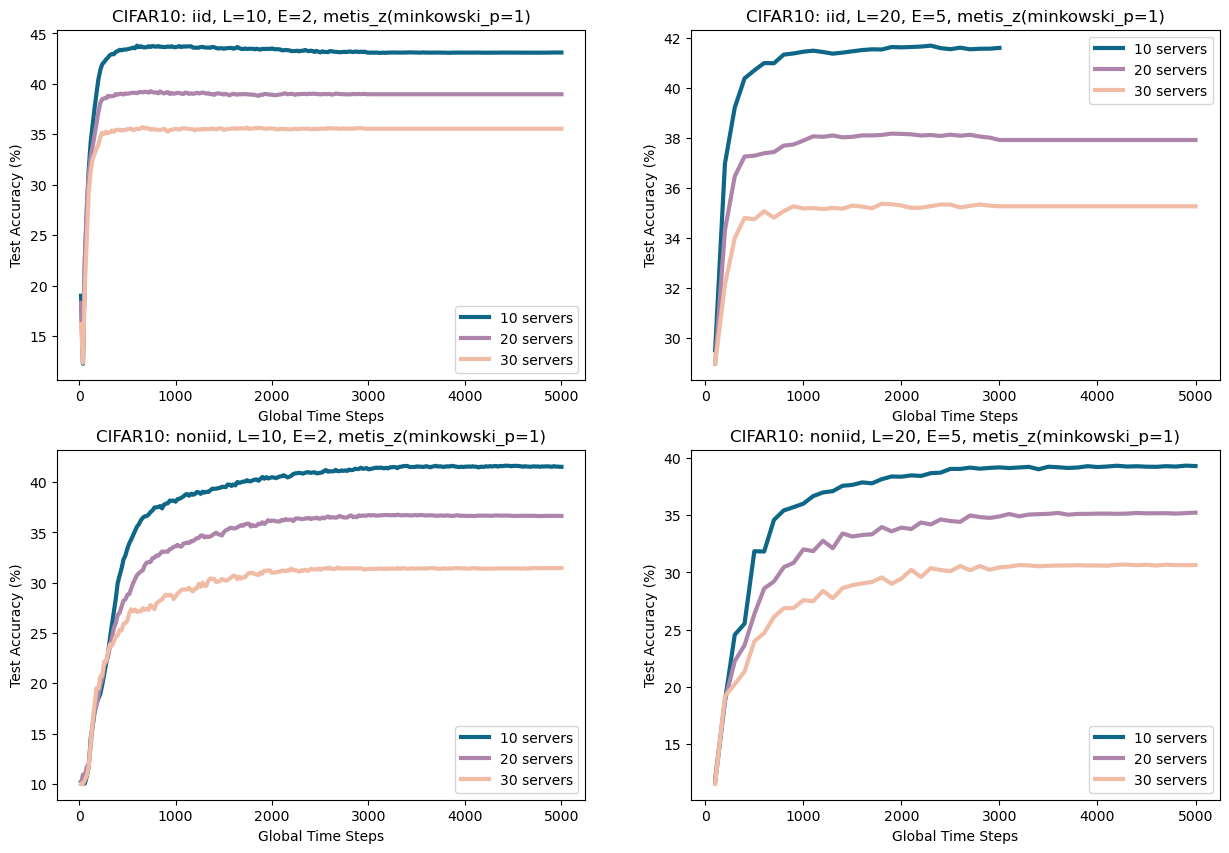

In [11]:
#plot


line_color = ["#0e6787", "#ad85ab", "#f0bca5"]
line_color2 = [ 'mediumblue', 'orangered','purple']


lbl_cluster = ["#edge_servers = 10", "#edge_servers = 20", "#edge_servers = 30"]
lbl_cluster = ["10 servers", "20 servers", "30 servers"]

fig, ax = plt.subplots(2, 2, figsize=(15,10))


for i in range(iidL10E2_n_files):
    df = iidL10E2_dfs[i][iidL10E2_dfs[i].global_round <= 5000]
    ax[0,0].plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color[i], linewidth = 3)
ax[0,0].set_title("CIFAR10: iid, L=10, E=2, metis_z(minkowski_p=1)")
ax[0,0].set_ylabel("Test Accuracy (%)")
ax[0,0].set_xlabel("Global Time Steps")
ax[0,0].legend(loc='best')

for i in range(iidL20E5_n_files):
    df = iidL20E5_dfs[i][iidL20E5_dfs[i].global_round <= 5000]
    ax[0,1].plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color[i], linewidth = 3)
ax[0,1].set_title("CIFAR10: iid, L=20, E=5, metis_z(minkowski_p=1)")
ax[0,1].set_ylabel("Test Accuracy (%)")
ax[0,1].set_xlabel("Global Time Steps")
ax[0,1].legend(loc='best')

for i in range(noniidL10E2_n_files):
    df = noniidL10E2_dfs[i][noniidL10E2_dfs[i].global_round <= 5000]
    ax[1,0].plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color[i], linewidth = 3)
ax[1,0].set_title("CIFAR10: noniid, L=10, E=2, metis_z(minkowski_p=1)")
ax[1,0].set_ylabel("Test Accuracy (%)")
ax[1,0].set_xlabel("Global Time Steps")
ax[1,0].legend(loc='best')

for i in range(noniidL20E5_n_files):
    df = noniidL20E5_dfs[i][noniidL20E5_dfs[i].global_round <= 5000]
    ax[1,1].plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color[i], linewidth = 3)
ax[1,1].set_title("CIFAR10: noniid, L=20, E=5, metis_z(minkowski_p=1)")
ax[1,1].set_ylabel("Test Accuracy (%)")
ax[1,1].set_xlabel("Global Time Steps")
ax[1,1].legend(loc='best')


plt.show()


In [12]:
#setting
ylim = [10, 45]

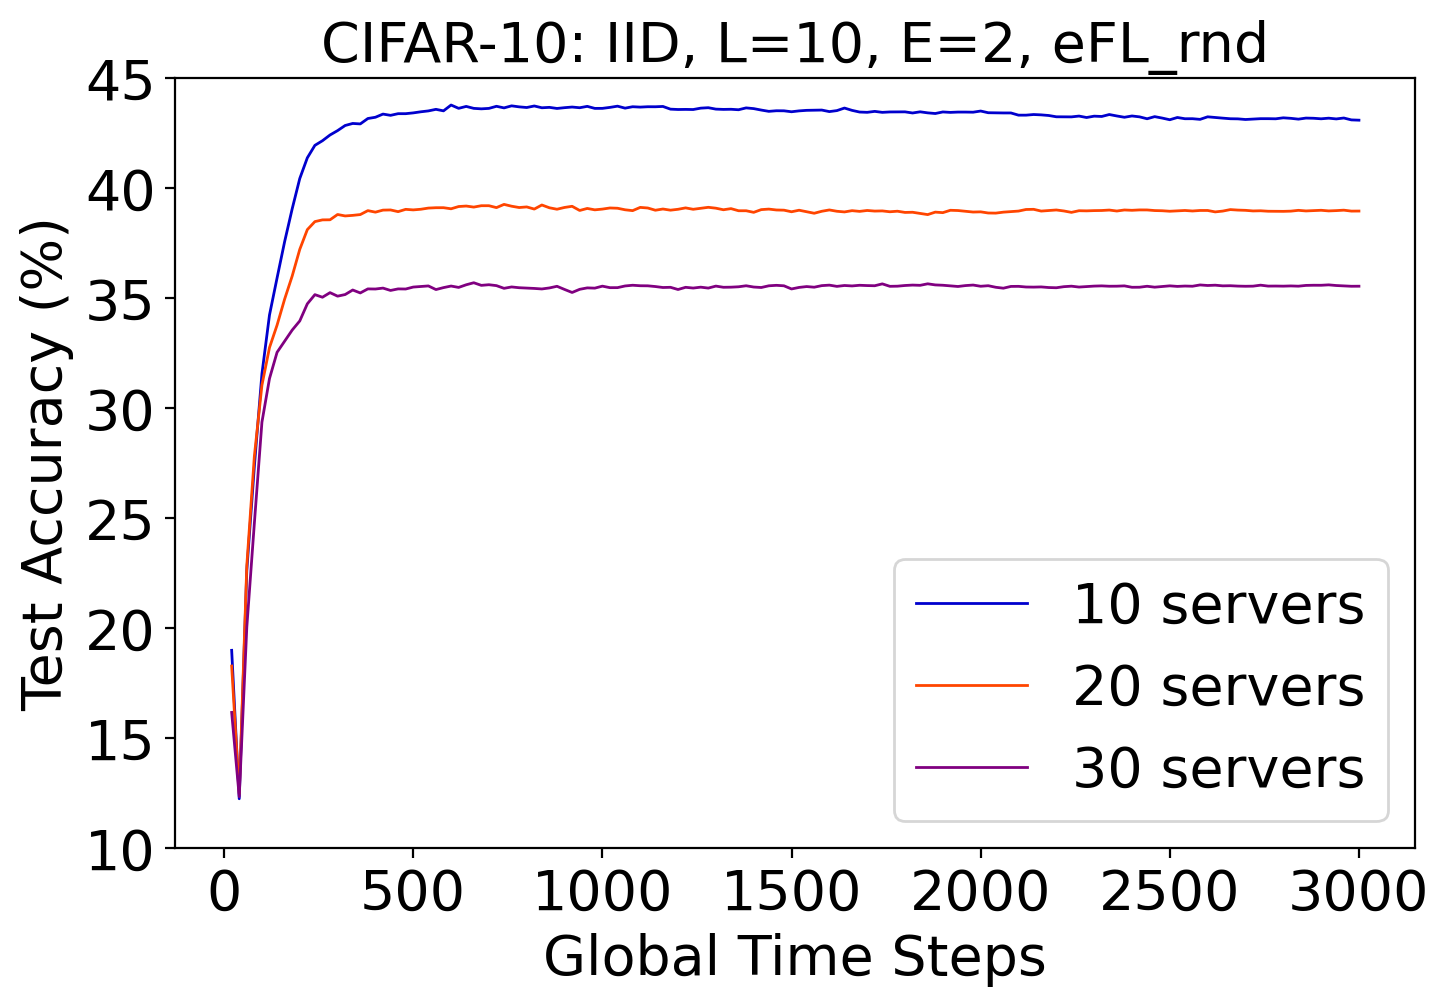

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)

for i in range(iidL10E2_n_files):
    df = iidL10E2_dfs[i][iidL10E2_dfs[i].global_round <= 3000]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)
ax.set_title("CIFAR-10: IID, L=10, E=2, eFL_rnd", size=fontsize) #18
ax.set_ylabel("Test Accuracy (%)", size=fontsize) #15
ax.set_xlabel("Global Time Steps", size=fontsize) #15
#ax.set_xticklabels(ax.get_xticklabels(), size = 15)
#ax.set_yticklabels(ax.get_yticklabels(), size = 15)
ax.set_ylim(ymin = ylim[0], ymax=ylim[1])
ax.legend(loc='best', fontsize=fontsize) #fontsize =15
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()
#plt.savefig('L10E2.png', dpi=300)

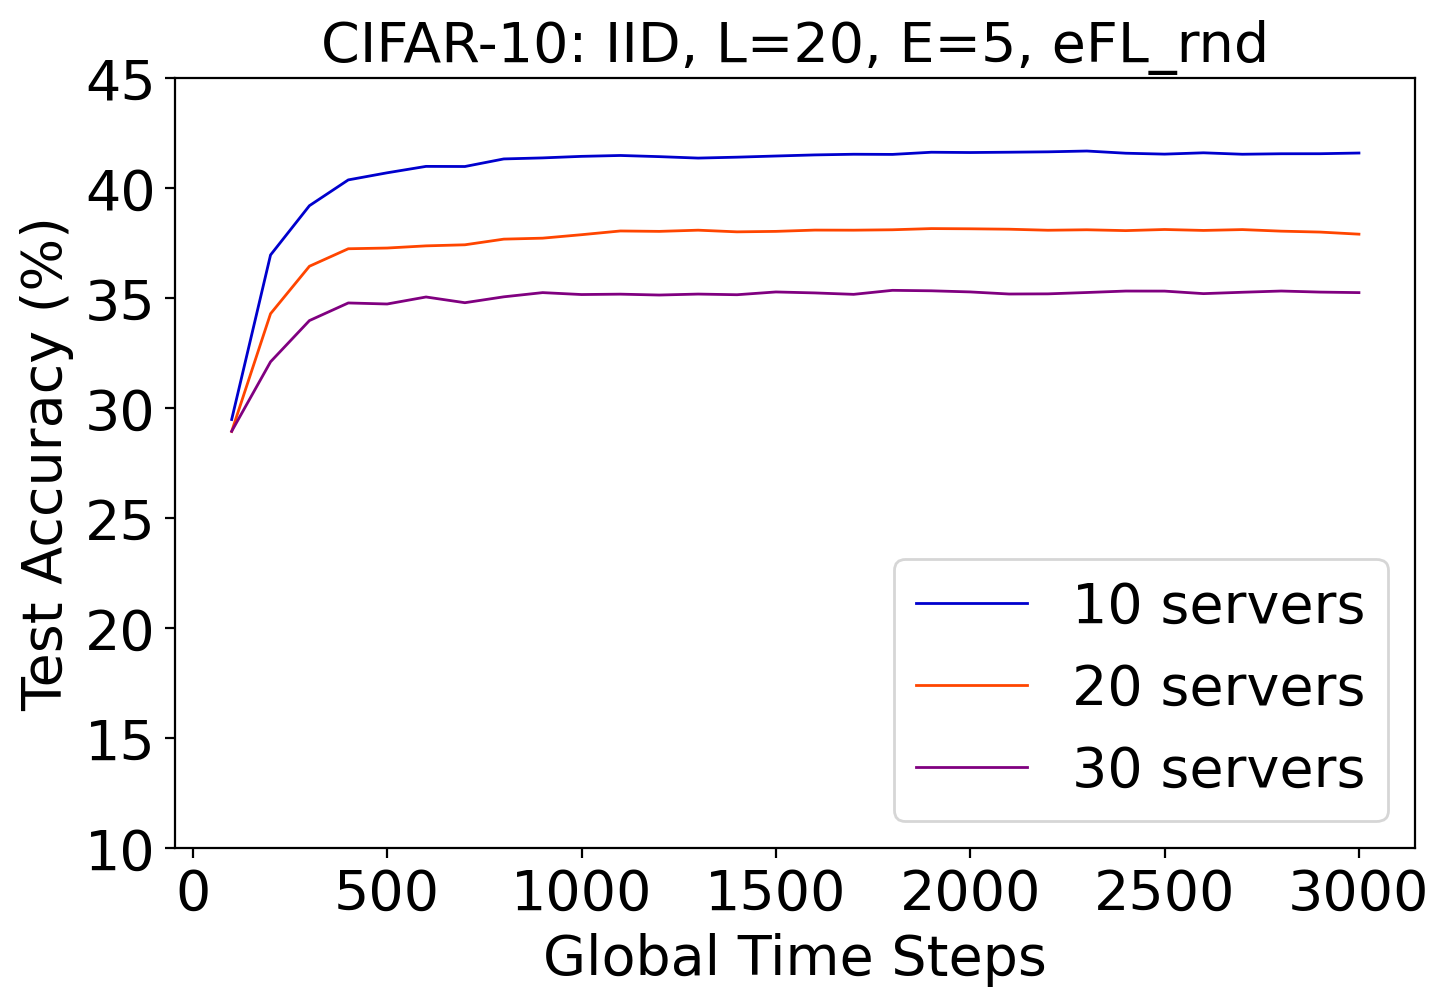

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)


for i in range(iidL20E5_n_files):
    df = iidL20E5_dfs[i][iidL20E5_dfs[i].global_round <= 3000]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)
ax.set_ylim(ymin = ylim[0], ymax=ylim[1])
ax.set_title("CIFAR-10: IID, L=20, E=5, eFL_rnd", size=fontsize)
ax.set_ylabel("Test Accuracy (%)", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.legend(loc='lower right', fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

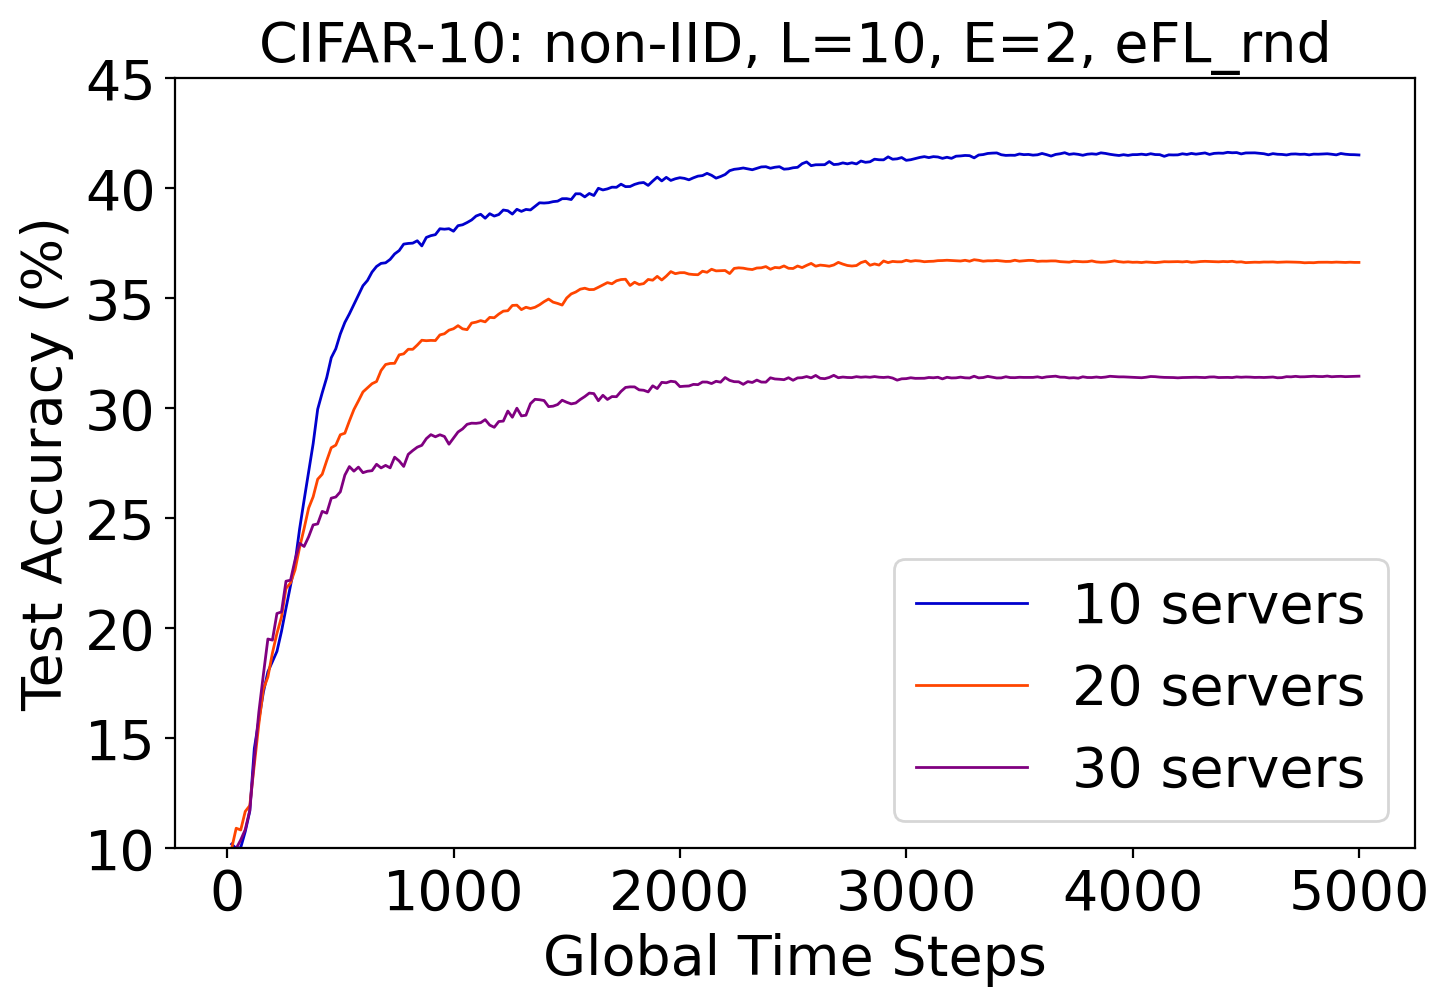

In [15]:
fig, ax = plt.subplots(figsize=(8,5))

ax.figure.set_dpi(200)

for i in range(noniidL10E2_n_files):
    df = noniidL10E2_dfs[i][noniidL10E2_dfs[i].global_round <= 5000]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)

ax.set_ylim(ymin = ylim[0], ymax=ylim[1])
ax.set_title("CIFAR-10: non-IID, L=10, E=2, eFL_rnd", size=fontsize)
ax.set_ylabel("Test Accuracy (%)", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.legend(loc='best', fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

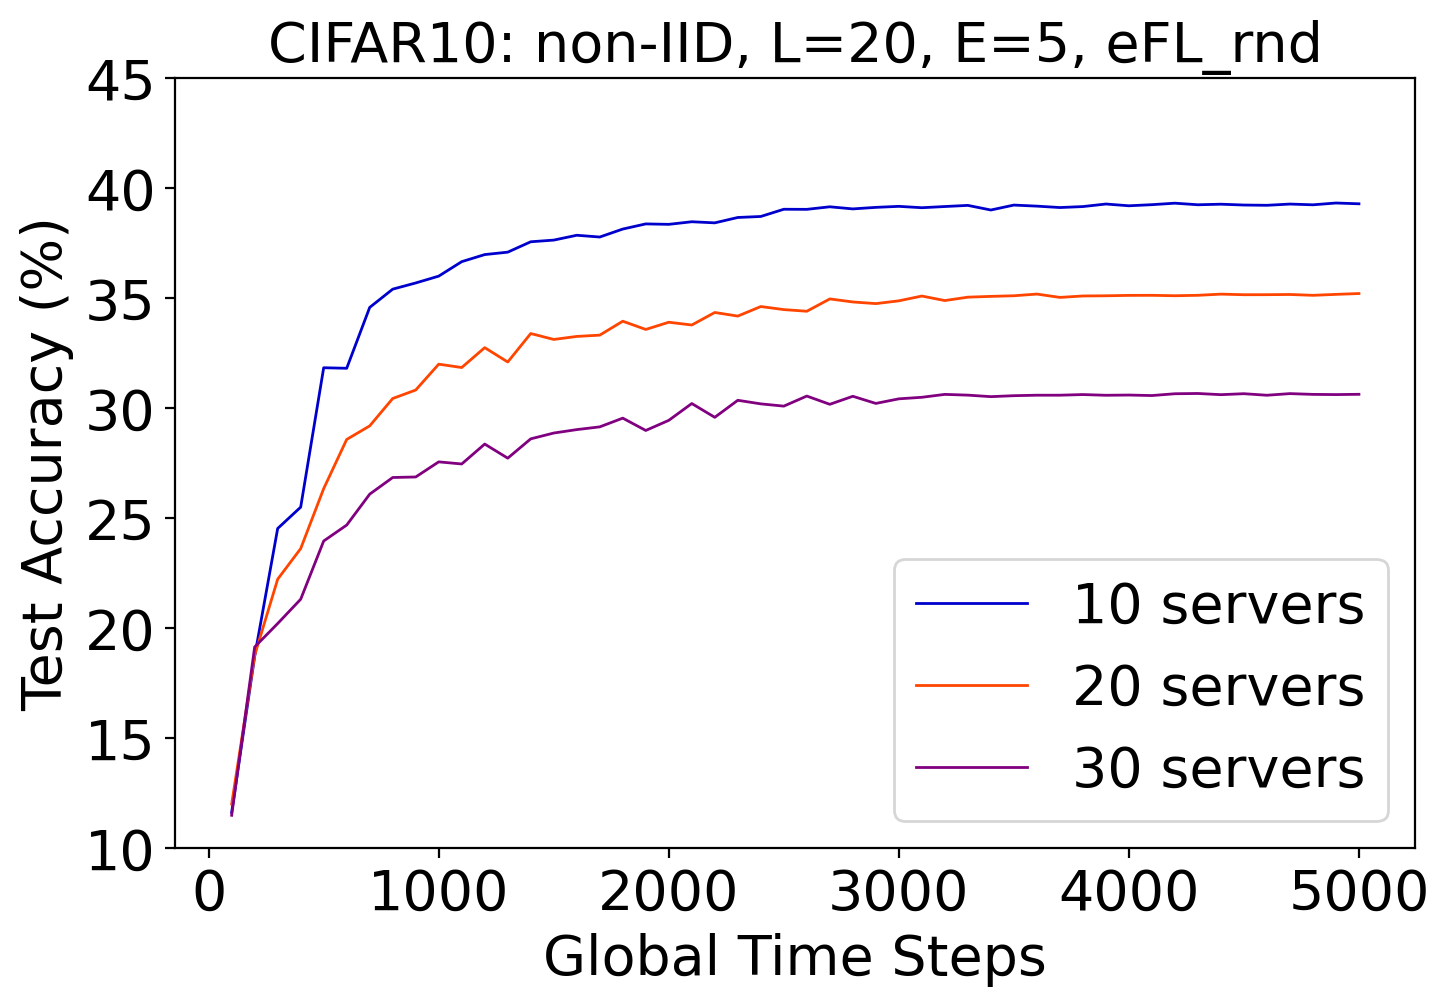

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)


for i in range(noniidL20E5_n_files):
    df = noniidL20E5_dfs[i][noniidL20E5_dfs[i].global_round <= 5000]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)

ax.set_ylim(ymin = ylim[0], ymax=ylim[1])
ax.set_title("CIFAR10: non-IID, L=20, E=5, eFL_rnd", size=fontsize)
ax.set_ylabel("Test Accuracy (%)", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.legend(loc='best', fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()